# IMPORTING LIBRARIES AND THE DATASET

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as esw
dataset=pd.read_csv("F:/ML LAB/classification/textclassification.csv")

# THERE ARE 100 RECORDS IN THE DATASET WITH FOUR CATEGORIES AND 25 RECORDS IN EACH OF THE CATEGORY

In [78]:
dataset.head()


,s no,input,label
0,1,US charity anthem is re-released\n\nWe Are The...,entertainment
1,2,Oscar nominee Dan O'Herlihy dies\n\nIrish acto...,entertainment
2,3,Ray Charles studio becomes museum\n\nA museum ...,entertainment
3,4,Actor Foxx sees Globe nominations\n\nUS actor ...,entertainment
4,5,Soul sensation ready for awards\n\nSouth West ...,entertainment


In [79]:
dataset.tail()

,s no,input,label
95,96,Hotspot users gain free net calls\n\nPeople us...,tech
96,97,Hotspot users gain free net calls\n\nPeople us...,tech
97,98,Man auctions ad space on forehead\n\nA 20-year...,tech
98,99,Moving mobile improves golf swing\n\nA mobile ...,tech
99,100,Junk e-mails on relentless rise\n\nSpam traffi...,tech


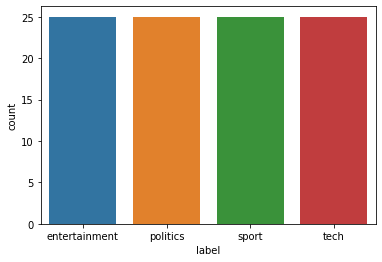

In [80]:
sns.countplot(x='label', data=dataset)
plt.show()

# TRAIN TEST SPLITTING

In [81]:
X = dataset['input']
y = dataset['label']


from sklearn.model_selection import train_test_split
corpus_train, corpus_test, train_label, test_label = train_test_split(X, y, test_size=0.2, random_state=101)

# BUILDING MATRICES

In [82]:
vectorizer = CountVectorizer(tokenizer=str.split, stop_words=esw)
corpus_train_mat = vectorizer.fit_transform(corpus_train)
corpus_train_mat = corpus_train_mat.toarray()

corpus_test_mat = vectorizer.transform(corpus_test)
corpus_test_mat = corpus_test_mat.toarray()

# NAIVE BAYES CLASSIFIER--TRAINING

In [83]:
def fit_NBclassifier(trainset, trainlabel):
    nbclassifier = MultinomialNB()
    nbclassifier.fit(trainset, trainlabel)
    
    return nbclassifier

In [84]:
NB_clf = fit_NBclassifier(corpus_train_mat, train_label)

#  NAIVE BAYES CLASSIFIER--TESTING

In [85]:
label_predicted = NB_clf.predict(corpus_test_mat)

# ACCURACY SCORE

In [86]:
accuracy = accuracy_score(test_label, label_predicted) 
accuracy 

0.95

# VISUALIZATION IN THE FORM OF CONFUSION MATRIX

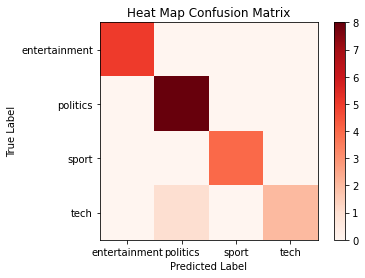

In [87]:
conf_mat = confusion_matrix(test_label, label_predicted)
labels = sorted(set(label_predicted))

plt.figure()
plt.title("Heat Map Confusion Matrix")
plt.imshow(conf_mat, interpolation="nearest", cmap=plt.cm.Reds)
plt.xticks(np.arange(len(labels)), labels)
plt.yticks(np.arange(len(labels)), labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.colorbar()
plt.show()

# MAKING PREDICTION FOR NEW DATA

In [76]:
new_data=["""r Foxx sees Globe nominations S actor Jamie Foxx has been given two nominations for 
Golden Globe awards, with Meryl Streep, Morgan Freeman and Cate Blanchett also up for prizes. he stars were shortlisted on Monday for supporting roles,
with the main nominations still to come. Foxx has starred in Collateral and Ray. Clive Owen, David Carradine and
Natalie Portman are also up for awards. The Golden Globes, Hollywood's second most prominent awards, are the first major 
nominations to be announced. Last year, The Lord Of the Rings: The Return Of the King was named best drama movie while Lost In
Translation won best musical or comedy. Sean Penn, Charlize Theron, Tim Robbins and Renee Zellweger all won acting awards -
mirroring the eventual Oscars outcome. The Golden Globes ceremony will take place on 16 January, with the Oscars following 
on 27 February."""]


corpus_test_mat1= vectorizer.transform(new_data)
corpus_test_mat1= corpus_test_mat1.toarray()
print(NB_clf.predict(corpus_test_mat1))

['entertainment']
